In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc


import uproot 
import awkward as ak
import pickle

In [2]:
file = "/home/dejavu/Projects/qgcal/Training/dijet_sample_newBDT_flatten.npy"
all_jets = np.load(file)
all_jets[:, 0] = all_jets[:, 0]/1e3

In [3]:
all_jets.shape # Flatten events, need to reshape to split 
# leading, subleading
# forward, central

(72778406, 9)

In [9]:
def split_jet_type(jets):
    gluon_idx = np.where(jets[:,6]==21)[0]
    light_quark_idx = np.where((jets[:,6]==1) | (jets[:,6]==2)| (jets[:,6]==3))[0]
    c_quark_idx = np.where(jets[:,6]==4)[0]
    b_quark_idx = np.where(jets[:,6]==5)[0]
    data_idx = np.where(jets[:,6]==-9999)[0]
    others_idx = np.where(jets[:,6]==-1)[0]

    gluon = jets[gluon_idx]
    quark = jets[light_quark_idx]
    c_quark = jets[c_quark_idx]
    b_quark = jets[b_quark_idx]
    data = jets[data_idx]
    others = jets[others_idx]

    return [gluon, quark, c_quark, b_quark, data, others]

In [28]:
splited_pt_eta_jets_types = split_jet_type(all_jets)

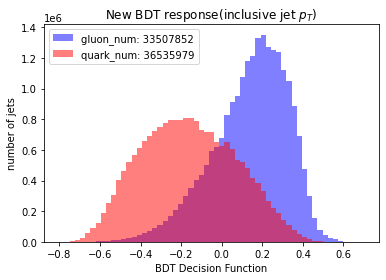

In [29]:
bdt_axis = np.linspace(-0.8, 0.7, 60 )
plt.hist(splited_pt_eta_jets_types[0][:,-1], 
        weights=splited_pt_eta_jets_types[0][:,-2], 
        bins= bdt_axis, alpha=0.5, 
        label='gluon'+f"_num: {len(splited_pt_eta_jets_types[0])}", color = 'blue') 
plt.hist(splited_pt_eta_jets_types[1][:,-1], 
        weights=splited_pt_eta_jets_types[1][:,-2], 
        bins= bdt_axis, alpha=0.5, 
        label='quark'+f"_num: {len(splited_pt_eta_jets_types[1])}", color = 'red')
plt.legend(loc='upper left')

plt.xlabel("BDT Decision Function")
plt.ylabel("number of jets")
plt.title(r"New BDT response(inclusive jet $p_T$)")
plt.savefig("plots_newTrainingPythia/BDT_dist_allpt")
plt.show()

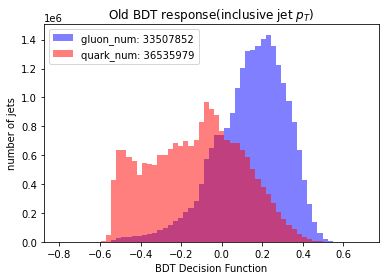

In [30]:
bdt_axis = np.linspace(-0.8, 0.7, 60 )
plt.hist(splited_pt_eta_jets_types[0][:,5], 
        weights=splited_pt_eta_jets_types[0][:,-2], 
        bins= bdt_axis, alpha=0.5, 
        label='gluon'+f"_num: {len(splited_pt_eta_jets_types[0])}", color = 'blue') 
plt.hist(splited_pt_eta_jets_types[1][:,5], 
        weights=splited_pt_eta_jets_types[1][:,-2], 
        bins= bdt_axis, alpha=0.5, 
        label='quark'+f"_num: {len(splited_pt_eta_jets_types[1])}", color = 'red')
plt.legend(loc='upper left')

plt.xlabel("BDT Decision Function")
plt.ylabel("number of jets")
plt.title(r"Old BDT response(inclusive jet $p_T$)")
plt.savefig("plots_oldTrainingPythia/BDT_dist_allpt")
plt.show()

In [23]:
label_pt_bin = [500, 600, 800, 1000, 1200, 1500, 2000]
def split_jet_pt(jets):
    splited_jet_pt = {}
    for i, pt_start in enumerate(label_pt_bin[:-1]):
        pt_selected_idx = np.where((jets[:,0] >= pt_start) & (jets[:,0] < label_pt_bin[i+1]))[0]
        splited_jet_pt[pt_start] = jets[pt_selected_idx]

    return splited_jet_pt

In [27]:
splited_jet_pt = split_jet_pt(all_jets)

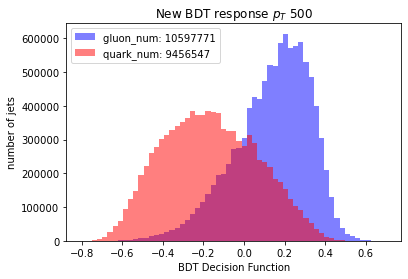

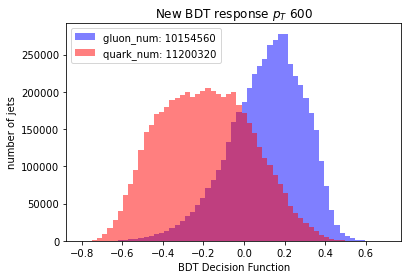

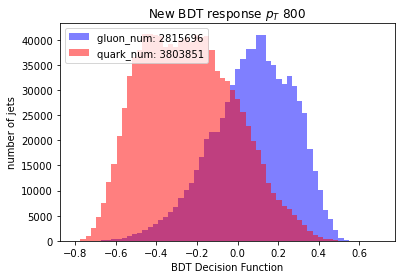

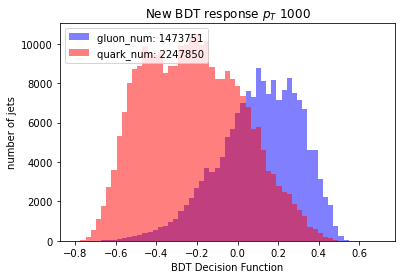

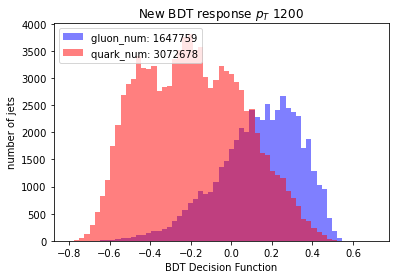

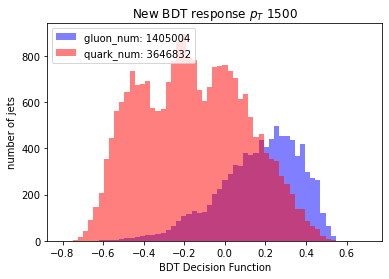

In [32]:
for k, splited_jet_pt_bin in splited_jet_pt.items():
    splited_pt_eta_jets_types = split_jet_type(splited_jet_pt_bin)
    
    bdt_axis = np.linspace(-0.8, 0.7, 60 )
    plt.hist(splited_pt_eta_jets_types[0][:,-1], 
            weights=splited_pt_eta_jets_types[0][:,-2], 
            bins= bdt_axis, alpha=0.5, 
            label='gluon'+f"_num: {len(splited_pt_eta_jets_types[0])}", color = 'blue') 
    plt.hist(splited_pt_eta_jets_types[1][:,-1], 
            weights=splited_pt_eta_jets_types[1][:,-2], 
            bins= bdt_axis, alpha=0.5, 
            label='quark'+f"_num: {len(splited_pt_eta_jets_types[1])}", color = 'red')
    plt.legend(loc='upper left')

    plt.xlabel("BDT Decision Function")
    plt.ylabel("number of jets")
    plt.title(r"New BDT response $p_T$" +f" {k}")
    plt.savefig(f"plots_newTrainingPythia/BDT_dist_pt{k}")
    plt.show()


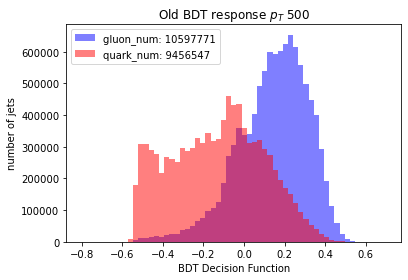

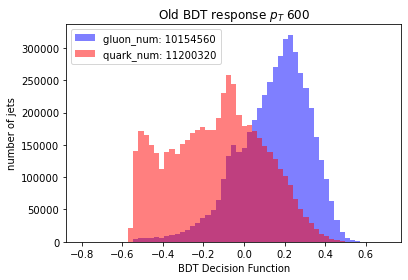

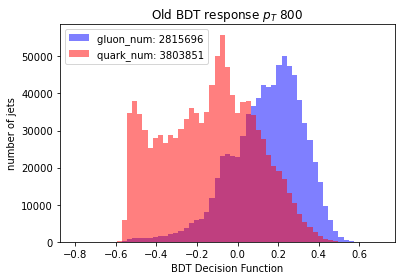

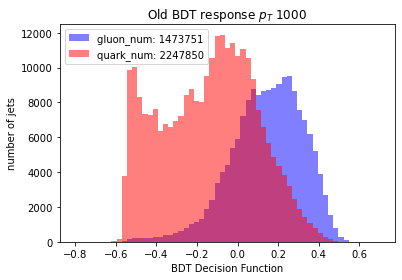

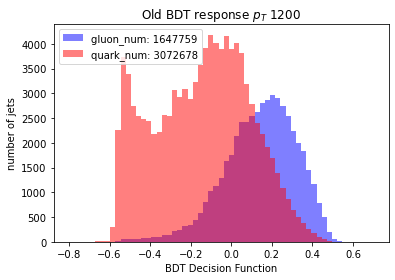

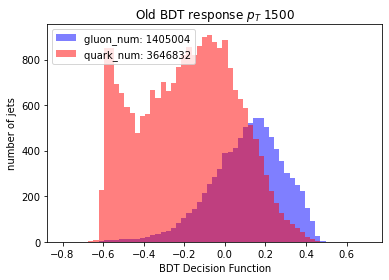

In [33]:
for k, splited_jet_pt_bin in splited_jet_pt.items():
    splited_pt_eta_jets_types = split_jet_type(splited_jet_pt_bin)
    
    bdt_axis = np.linspace(-0.8, 0.7, 60 )
    plt.hist(splited_pt_eta_jets_types[0][:,5], 
            weights=splited_pt_eta_jets_types[0][:,-2], 
            bins= bdt_axis, alpha=0.5, 
            label='gluon'+f"_num: {len(splited_pt_eta_jets_types[0])}", color = 'blue') 
    plt.hist(splited_pt_eta_jets_types[1][:,5], 
            weights=splited_pt_eta_jets_types[1][:,-2], 
            bins= bdt_axis, alpha=0.5, 
            label='quark'+f"_num: {len(splited_pt_eta_jets_types[1])}", color = 'red')
    plt.legend(loc='upper left')

    plt.xlabel("BDT Decision Function")
    plt.ylabel("number of jets")
    plt.title(r"Old BDT response $p_T$" +f" {k}")
    plt.savefig(f"plots_oldTrainingPythia/BDT_dist_pt{k}")
    plt.show()


## split leading/subleading, central/forward

In [4]:
all_jets_event = np.reshape(all_jets, (len(all_jets)//2,2,9))

In [5]:
label_pt = ["LeadingJet", "SubJet"]
label_eta = ["Forward", "Central"]
label_type = ["Gluon", "Quark", "C_Quark", "B_Quark", "Data", "Other"]
label_var = ["pt", "eta", "ntrk", "width", "c1", "bdt", "newBDT"]
label_pt_bin = [500, 600, 800, 1000, 1200, 1500, 2000]

In [6]:
all_jets_event.shape

(36389203, 2, 9)

In [7]:
def split_pt_eta_jet(jets):
    # divide jets into 4 regions 
    forward_idx = np.argmax(np.abs(jets[:,:,1]), axis=1) # compare abs eta of jets inside events
    central_idx = -1*forward_idx+1

    leading_forward_idx = forward_idx == 0 # leading forward 
    subleading_forward_idx = forward_idx == 1 # subleading forward 

    leading_central_idx = central_idx == 0 # leading central 
    subleading_central_idx = central_idx == 1 # subleading central 

    return [jets[leading_forward_idx, 0, :], jets[leading_central_idx, 0, :],  
            jets[subleading_forward_idx, 1, :], jets[subleading_central_idx, 1, :]]

def split_jet_type(jets):
    gluon_idx = np.where(jets[:,6]==21)[0]
    light_quark_idx = np.where((jets[:,6]==1) | (jets[:,6]==2)| (jets[:,6]==3))[0]
    c_quark_idx = np.where(jets[:,6]==4)[0]
    b_quark_idx = np.where(jets[:,6]==5)[0]
    data_idx = np.where(jets[:,6]==-9999)[0]
    others_idx = np.where(jets[:,6]==-1)[0]

    gluon = jets[gluon_idx]
    quark = jets[light_quark_idx]
    c_quark = jets[c_quark_idx]
    b_quark = jets[b_quark_idx]
    data = jets[data_idx]
    others = jets[others_idx]

    return [gluon, quark, c_quark, b_quark, data, others]

def split_jet_pt(jets):
    splited_jet_pt = {}
    for i, pt_start in enumerate(label_pt_bin[:-1]):
        pt_selected_idx = np.where((jets[:,0] >= pt_start) & (jets[:,0] < label_pt_bin[i+1]))[0]
        splited_jet_pt[pt_start] = jets[pt_selected_idx]

    return splited_jet_pt


In [8]:
def DrawBDTDist(gluon, quark, prefix, pt_value):
    bdt_versions = [5,8]
    bdt_version_strings = ["old", "new"]
    for i, bdt_version in enumerate(bdt_versions):
        plt.hist(gluon[:,bdt_version], 
                weights=gluon[:,-2], 
                bins= bdt_axis, alpha=0.5, 
                label='gluon'+f"_num: {len(gluon)}", color = 'blue') 
        plt.hist(quark[:,bdt_version], 
                weights=quark[:,-2], 
                bins= bdt_axis, alpha=0.5, 
                label='quark'+f"_num: {len(quark)}", color = 'red')
        plt.legend(loc='upper left')

        plt.xlabel("BDT Decision Function")
        plt.ylabel("number of jets")
        plt.title(bdt_version_strings[i] + r" BDT response $p_T$" +f" {pt_value} in {prefix}")
        plt.savefig(f"plots_{bdt_version_strings[i]}TrainingPythia/BDT_dist_pt_"+f"{prefix}_{pt_value}")
        plt.show()

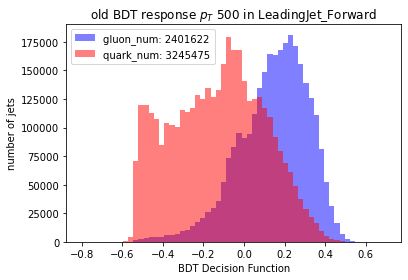

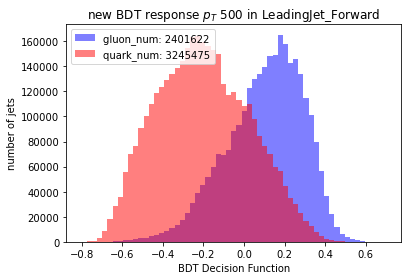

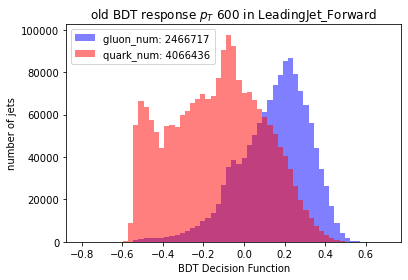

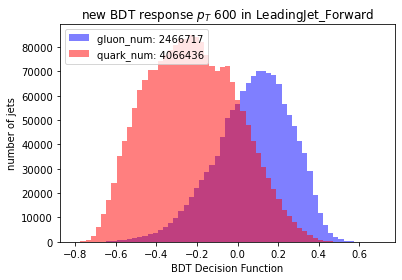

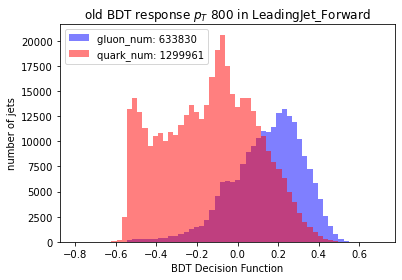

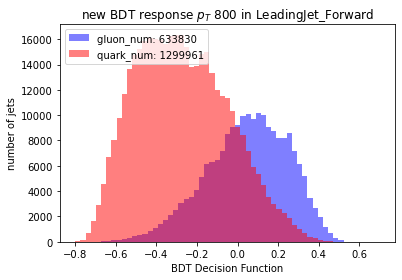

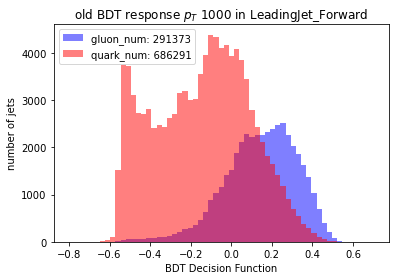

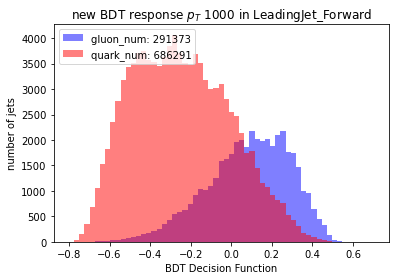

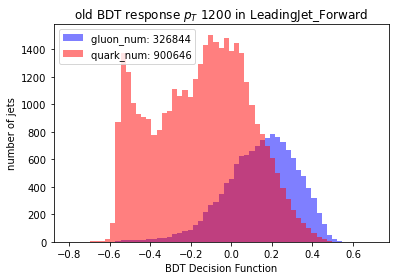

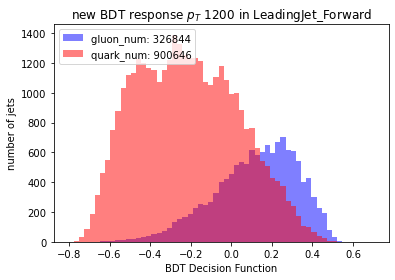

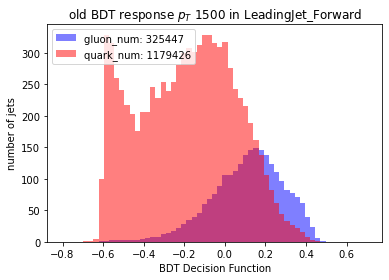

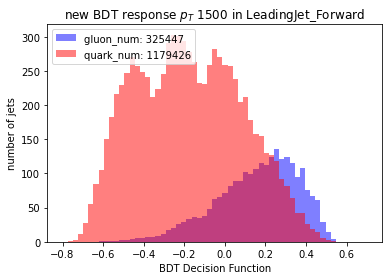

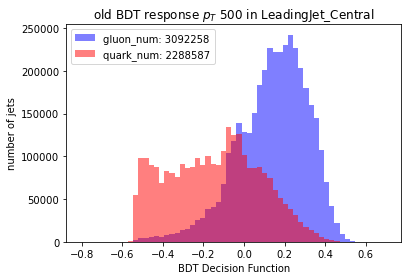

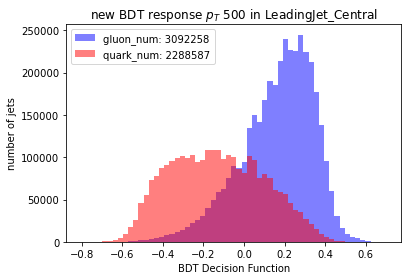

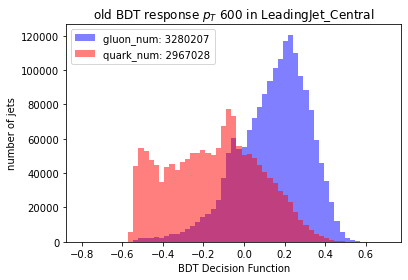

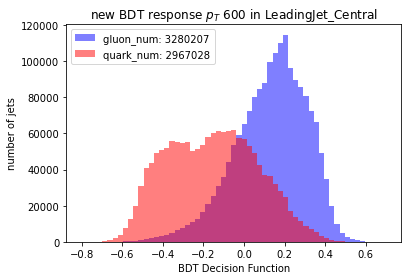

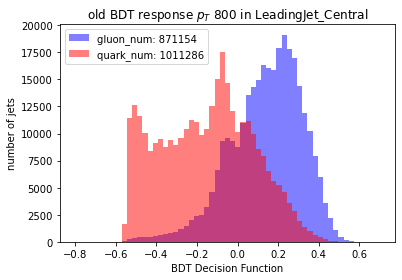

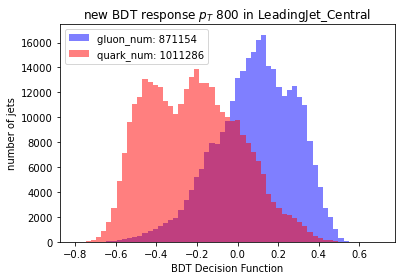

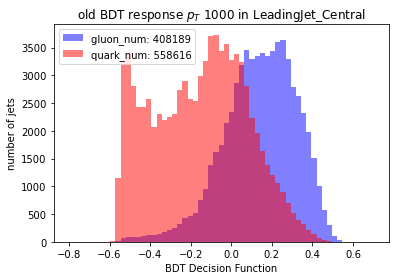

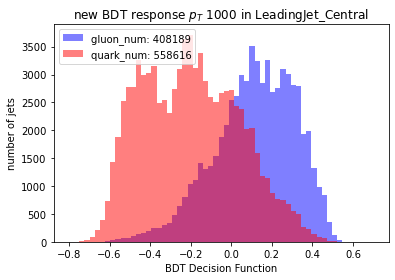

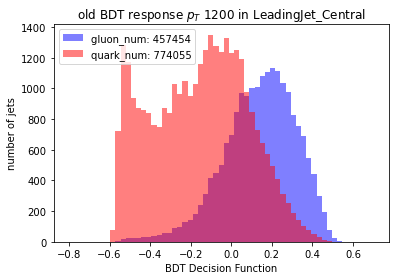

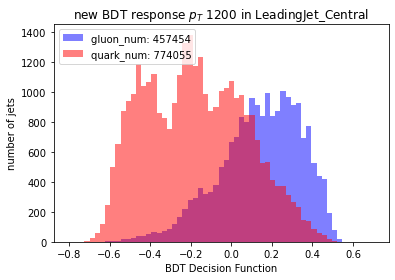

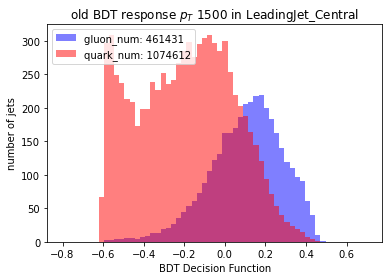

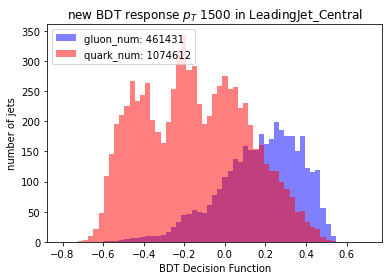

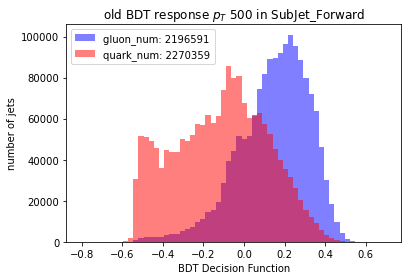

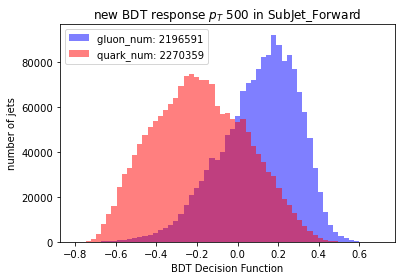

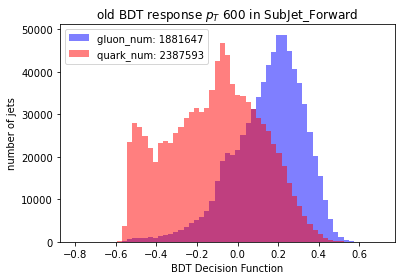

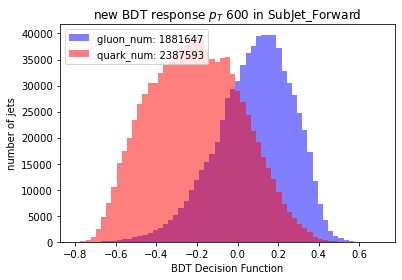

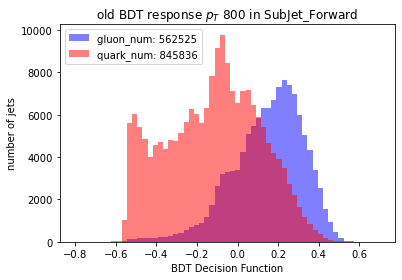

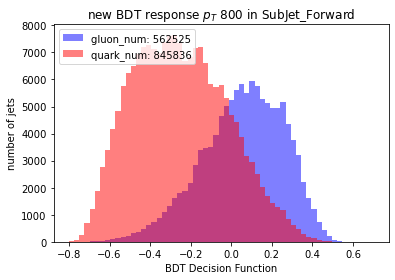

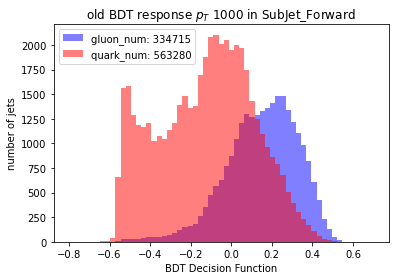

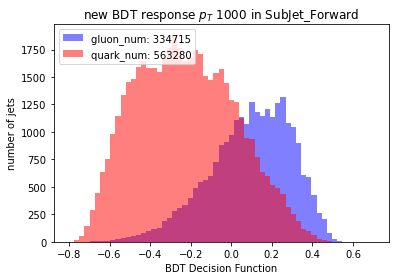

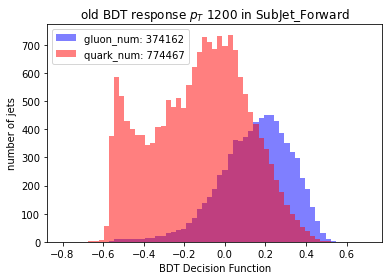

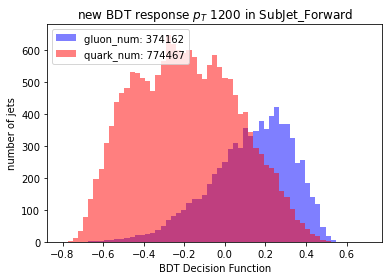

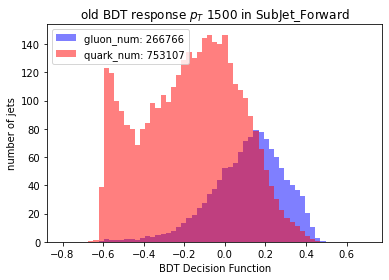

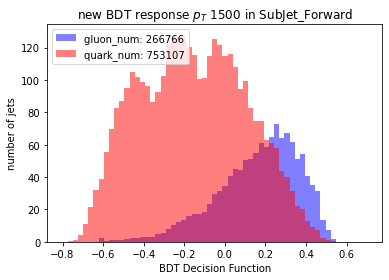

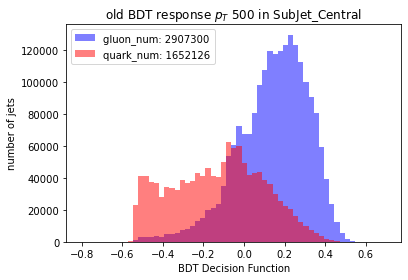

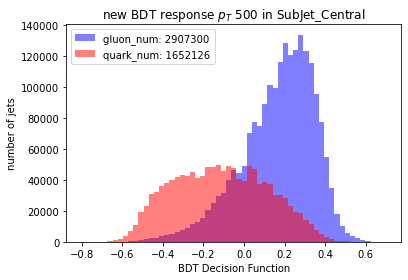

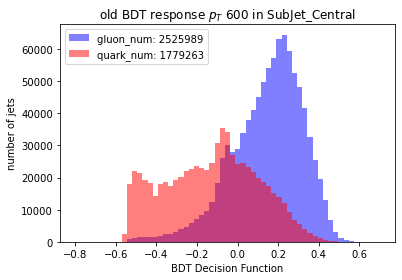

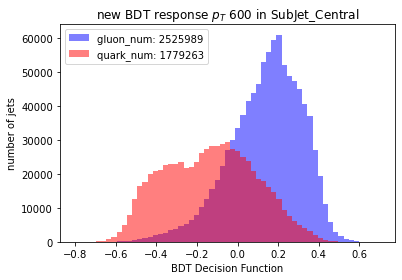

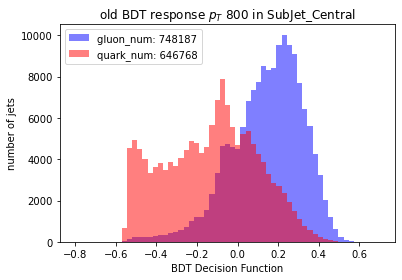

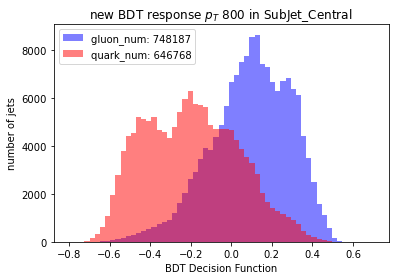

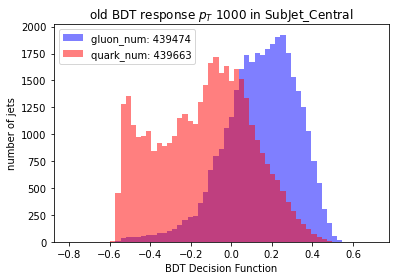

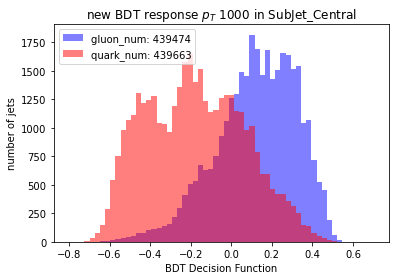

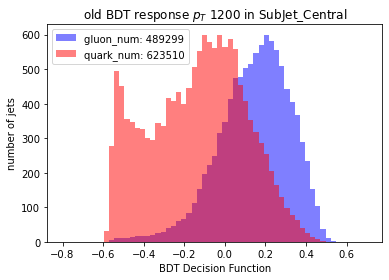

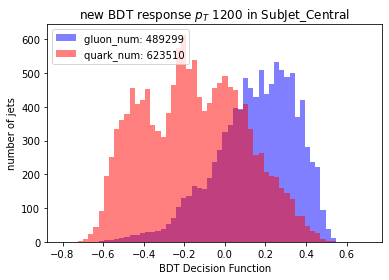

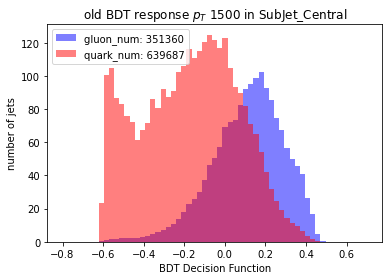

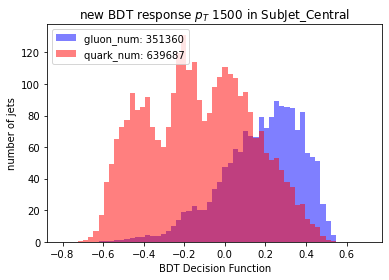

In [9]:
splited_pt_eta_jets = split_pt_eta_jet(all_jets_event)
label_pt_eta = [label1_pt + "_" + label2_eta for label1_pt in label_pt for label2_eta in label_eta]
label_type = ["Gluon", "Quark", "C_Quark", "B_Quark", "Data", "Other"]
n_jets = 0

for i, splited_pt_eta_jet in enumerate(splited_pt_eta_jets):
    n_jets += len(splited_pt_eta_jet)

    splited_pt_eta_pt_bins = split_jet_pt(splited_pt_eta_jet)
    for j, splited_pt_eta_pt_bin in splited_pt_eta_pt_bins.items():
        splited_pt_eta_jets_types = split_jet_type(splited_pt_eta_pt_bin)

        bdt_axis = np.linspace(-0.8, 0.7, 60)
        
        prefix =  label_pt_eta[i]
        DrawBDTDist(gluon=splited_pt_eta_jets_types[0], quark=splited_pt_eta_jets_types[1],
                    prefix = prefix, pt_value=j)
            
            

assert n_jets == len(all_jets_event)*2 # Check if jets are splited correctly 

In [6]:
branch_names = ["jet_pt", "jet_eta", "jet_nTracks", "jet_trackWidth", "jet_trackC1", "jet_trackBDT", "jet_PartonTruthLabelID", "total_weight", "newBDTScore"]